In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/graph_based_recommender_system-main'

/content/drive/.shortcut-targets-by-id/1JFzXNlgU4pRrPFbd7DUVLrlSMgLjHD8V/Colab Notebooks/graph_based_recommender_system-main


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pymongo==3.12.0
!pip install pyyaml==6.0
!pip install tqdm==4.62.3
!pip install interchange==2021.0.4
!pip install monotonic==1.6
!pip install ordered-set==4.1.0
!pip install pansi==2020.7.3
!pip install pytz==2021.3
!pip install py2neo==2021.2.3

     |████████████████████████████████| 526 kB 5.2 MB/s 
  Attempting uninstall: pymongo
    Found existing installation: pymongo 4.1.1
    Uninstalling pymongo-4.1.1:
      Successfully uninstalled pymongo-4.1.1
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 76 kB 2.8 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
     |████████████████████████████████| 503 kB 5.1 MB/s 
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [ ]:
!python generate_rdf_small.py --mongodb-host 52.53.202.9 --username mongo --password avengers

Namespace(database='amazon_product_review', mongodb_host='52.53.202.9', mongodb_port=27017, password='avengers', username='mongo')
100% 5000/5000 [00:24<00:00, 207.69it/s]


In [ ]:
amazon = pd.read_csv('data/amazon-product-review/train.txt',sep='\t',header=None)

In [ ]:
amazon.head()

,0,1,2
0,B00GROQCW8,is_an_instance_of,"Clothing, Shoes & Jewelry"
1,B00N6ALMTY,also_view,B07G4Q9JFS
2,B00HUC4RW8,also_view,B01N8YNTBO
3,B00VXCKPFE,is_an_instance_of,Wigs
4,B00WEABJXG,also_buy,B071NLKZ2Q


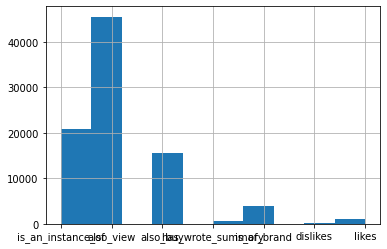

In [ ]:
pd.DataFrame(amazon).iloc[:,1].hist()

In [ ]:
amazon.iloc[:,1].value_counts()

also_view            45547
is_an_instance_of    20810
also_buy             15596
is_of_brand           3954
likes                 1045
has_wrote_summary      527
dislikes               163
Name: 1, dtype: int64

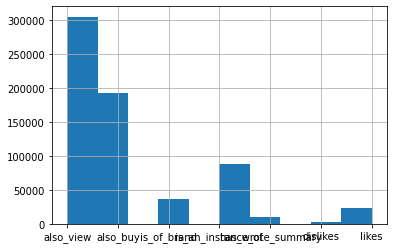

In [ ]:
pd.DataFrame(amazon_kg).iloc[:,1].hist()

In [ ]:
amazon_kg.iloc[:,1].value_counts(normalize=True)

also_view            0.462509
also_buy             0.291481
is_an_instance_of    0.134126
is_of_brand          0.054933
likes                0.036192
has_wrote_summary    0.015989
dislikes             0.004770
Name: 1, dtype: float64

In [ ]:
amazon_kg.iloc[:,1].value_counts()

also_view            305417
also_buy             192479
is_an_instance_of     88570
is_of_brand           36275
likes                 23899
has_wrote_summary     10558
dislikes               3150
Name: 1, dtype: int64

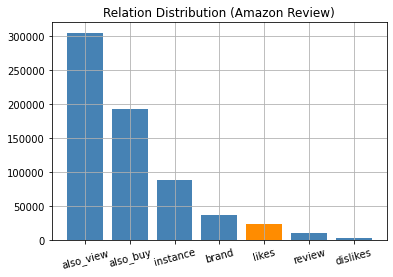

In [ ]:
y = [305417, 192479, 88570, 36275, 23899, 10558, 3150]
x_label = ["also_view","also_buy","instance","brand","likes","review","dislikes"]
plt.xticks(rotation = 15)
color = ["steelblue","steelblue","steelblue","steelblue","darkorange","steelblue","steelblue"]
plt.bar(x_label,y,color = color)
plt.title('Relation Distribution (Amazon Review)')
plt.grid()
plt.show()

In [4]:
def read_rdf(path):
    return pd.read_csv(path, header=None, sep="\t")

In [5]:
def draw_relations_distribution_plot(df, name = 'dsname', labels=True, size = (15, 8), rotate = 0):
    sns.set(rc = {'figure.figsize': size})
    sns.set(style="whitegrid")
    g = sns.countplot(x=1, data=df, order = df[1].value_counts().index)
    g.set(xlabel="Relations")
    g.set(title="Relations Distribution \n dataset: %s" %name)
    g.set_xticklabels(g.get_xticklabels(),rotation = rotate)
    if not labels:
        g.set(xticklabels=[])

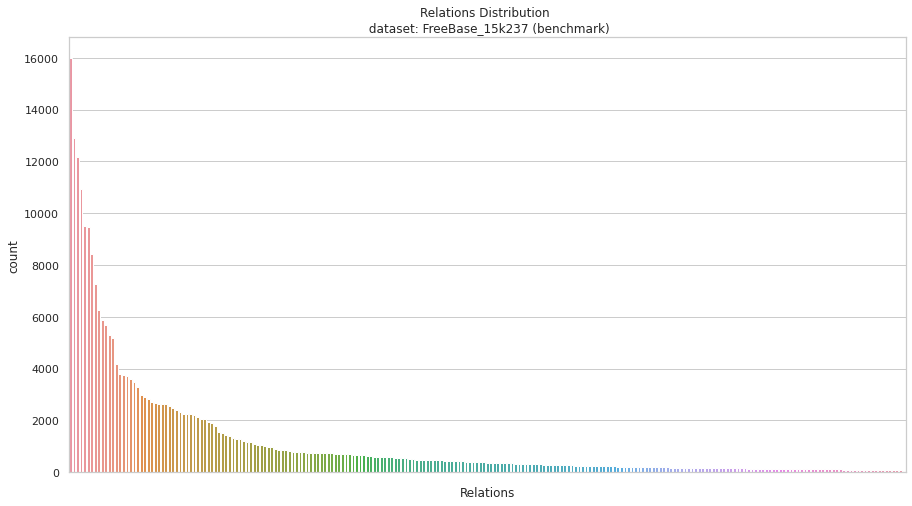

In [6]:
df = read_rdf("models/CompGCN/data_compressed/FB15k-237/train.txt")
draw_relations_distribution_plot(df,  "FreeBase_15k237 (benchmark)",  labels=False)

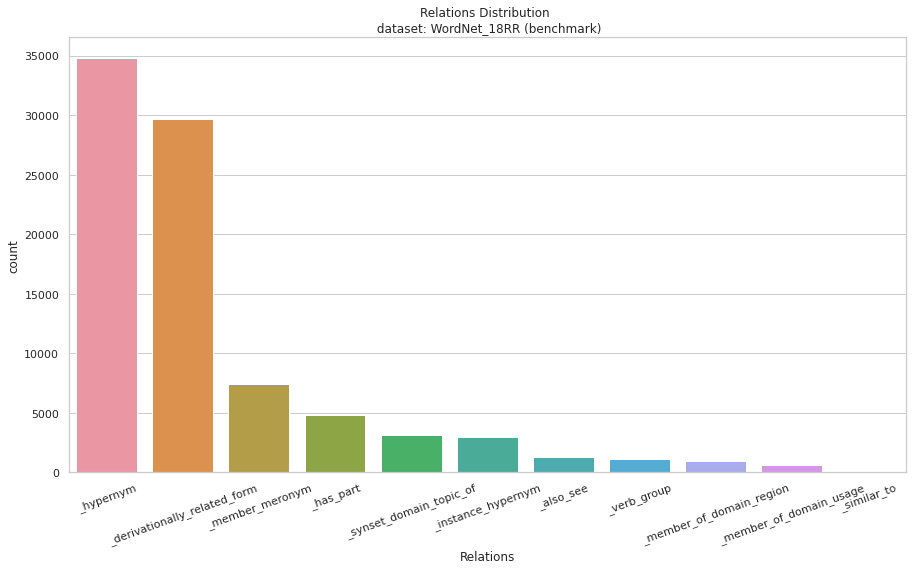

In [7]:
df = read_rdf("models/CompGCN/data_compressed/WN18RR/train.txt")
draw_relations_distribution_plot(df, "WordNet_18RR (benchmark)", rotate = 20)

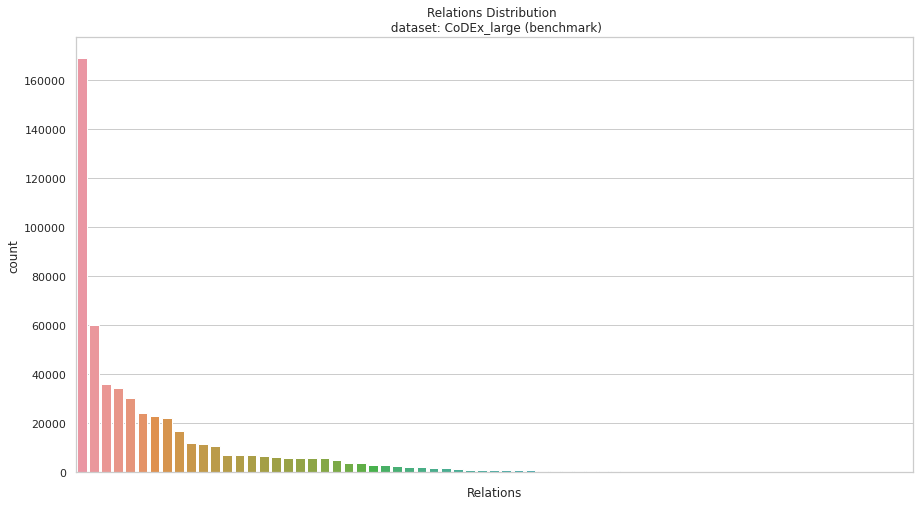

In [ ]:
df = read_rdf("models/KGE/data/codex-l/train.txt")
draw_relations_distribution_plot(df, "CoDEx_large (benchmark)", labels = False)

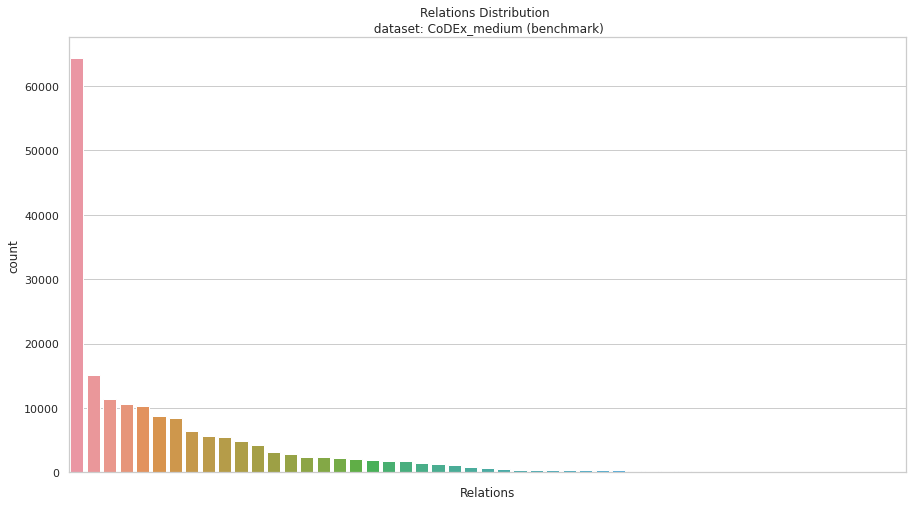

In [ ]:
df = read_rdf("models/KGE/data/codex-m/train.txt")
draw_relations_distribution_plot(df, "CoDEx_medium (benchmark)", labels = False)

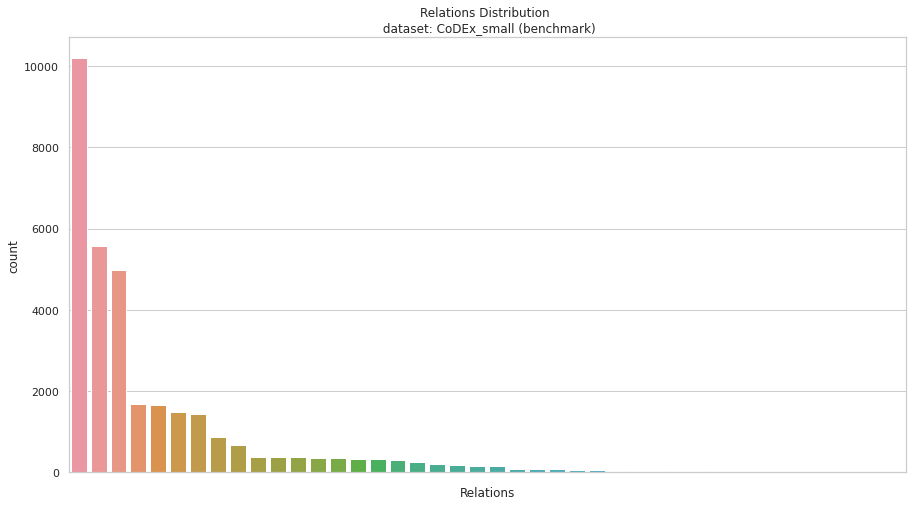

In [ ]:
df = read_rdf("models/KGE/data/codex-s/train.txt")
draw_relations_distribution_plot(df, "CoDEx_small (benchmark)", labels = False)

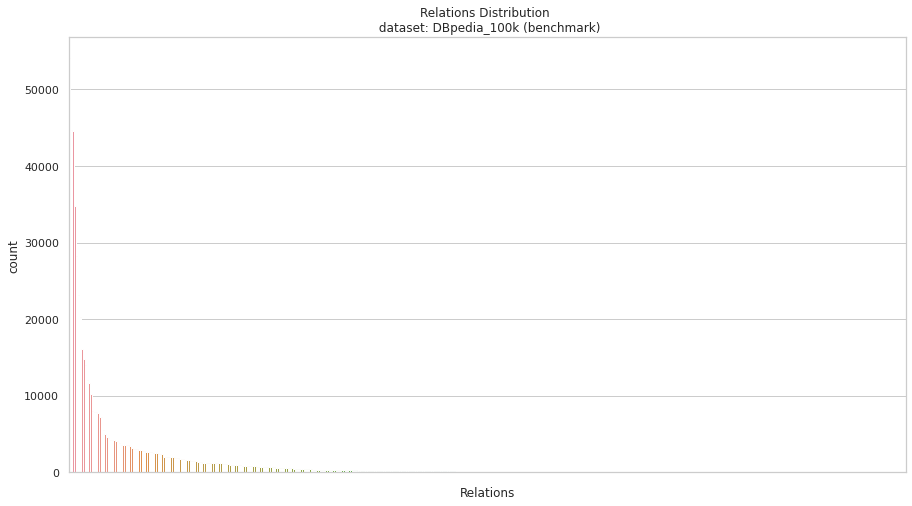

In [ ]:
df = read_rdf("models/KGE/data/db100k/train.txt")
draw_relations_distribution_plot(df, "DBpedia_100k (benchmark)", labels = False)

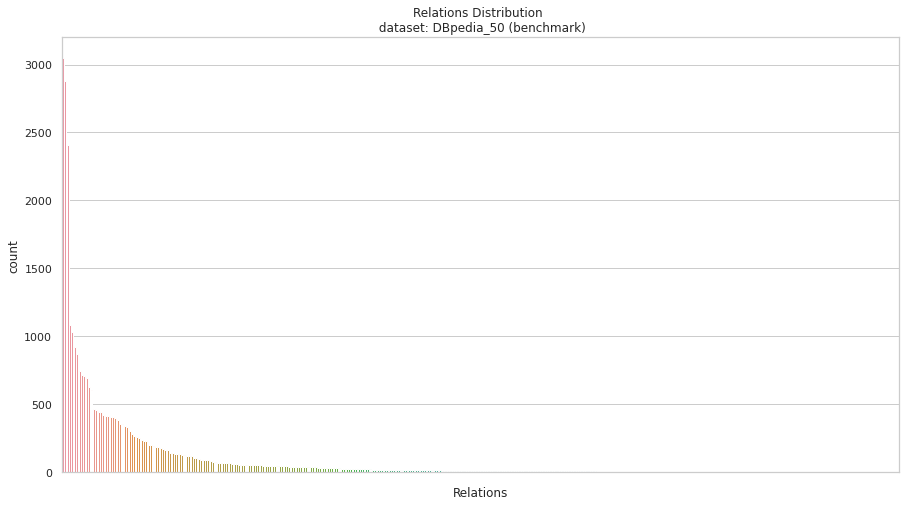

In [ ]:
df = read_rdf("models/KGE/data/dbpedia50/train.txt")
draw_relations_distribution_plot(df, "DBpedia_50 (benchmark)", labels = False)

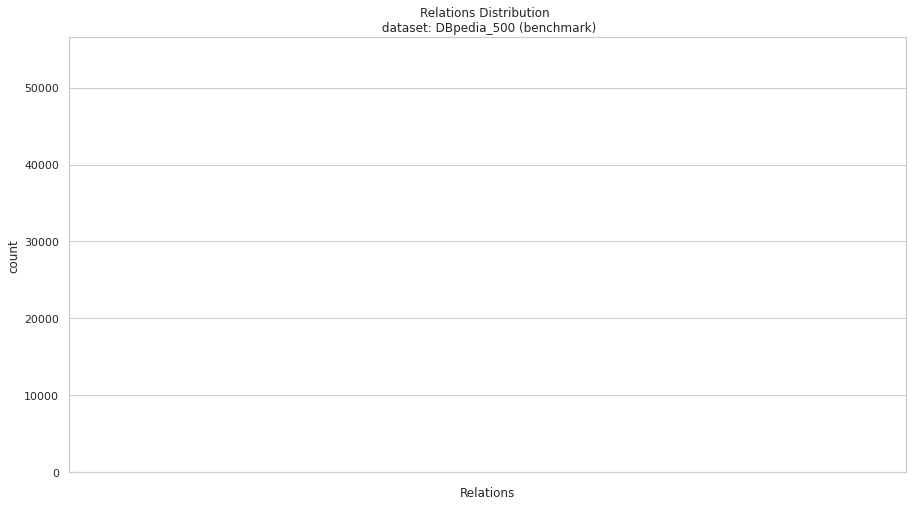

In [34]:
df = read_rdf("models/KGE/data/dbpedia500/train.txt")
draw_relations_distribution_plot(df, "DBpedia_500 (benchmark)", labels = False)

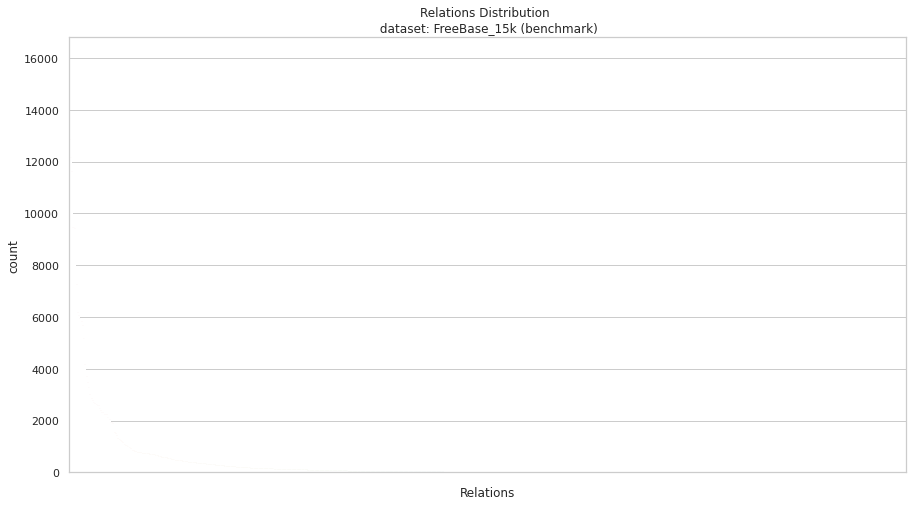

In [33]:
df = read_rdf("models/KGE/data/fb15k/train.txt")
draw_relations_distribution_plot(df, "FreeBase_15k (benchmark)", labels = False)

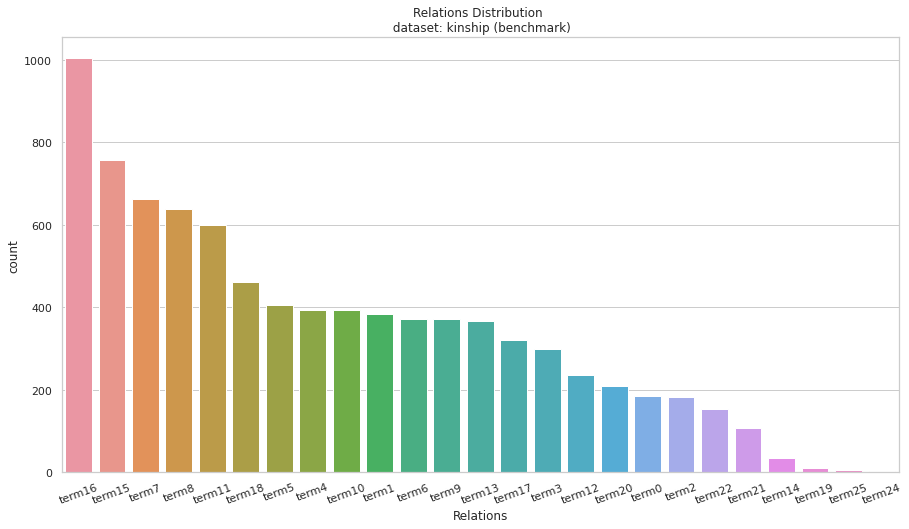

In [11]:
df = read_rdf("models/KGE/data/kinship/train.txt")
draw_relations_distribution_plot(df, "kinship (benchmark)", rotate = 20 )

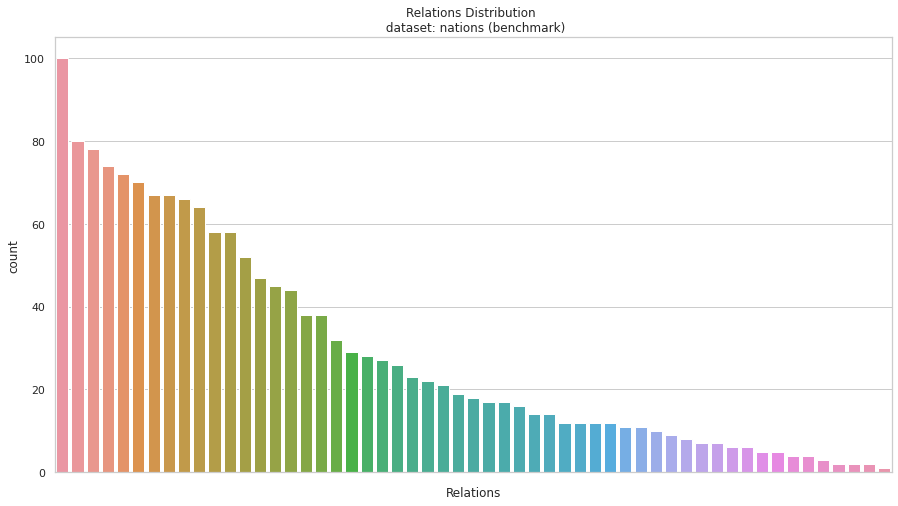

In [13]:
df = read_rdf("models/KGE/data/nations/train.txt")
draw_relations_distribution_plot(df, "nations (benchmark)", labels = False)

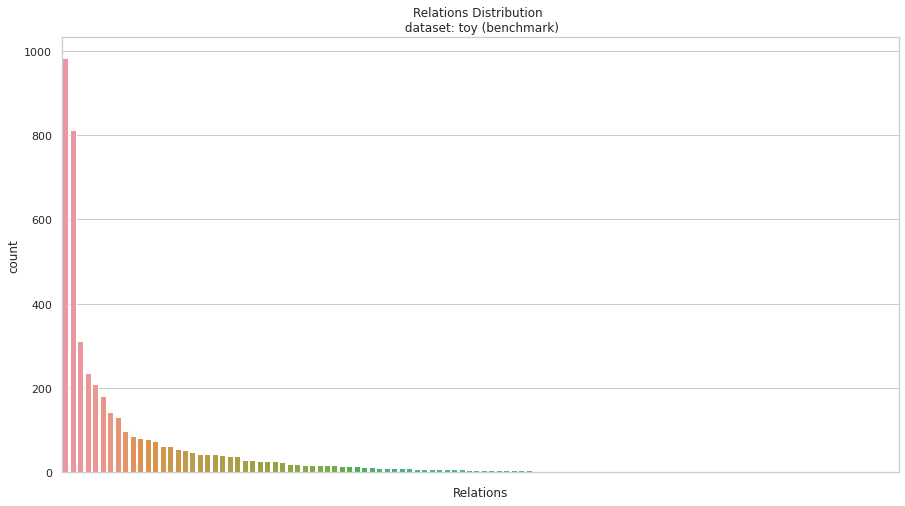

In [14]:
df = read_rdf("models/KGE/data/toy/train.txt")
draw_relations_distribution_plot(df, "toy (benchmark)", labels = False)

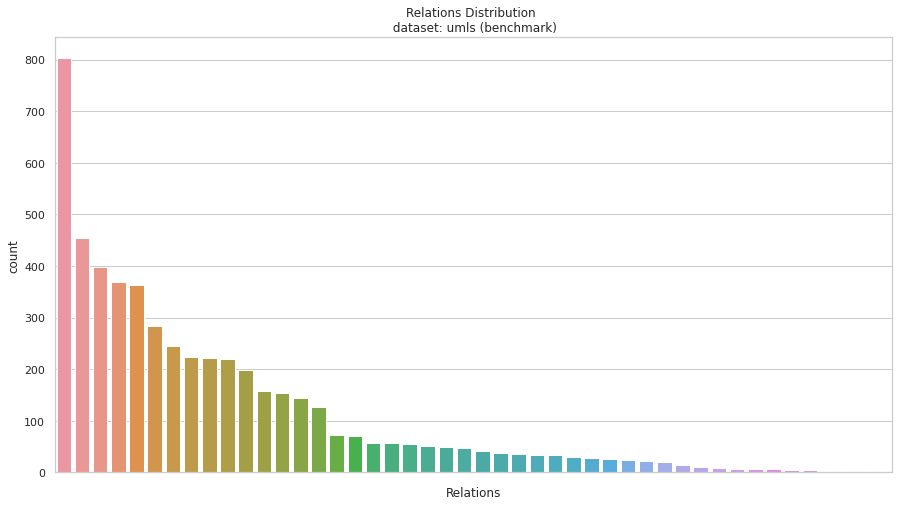

In [15]:
df = read_rdf("models/KGE/data/umls/train.txt")
draw_relations_distribution_plot(df, "umls (benchmark)", labels = False)

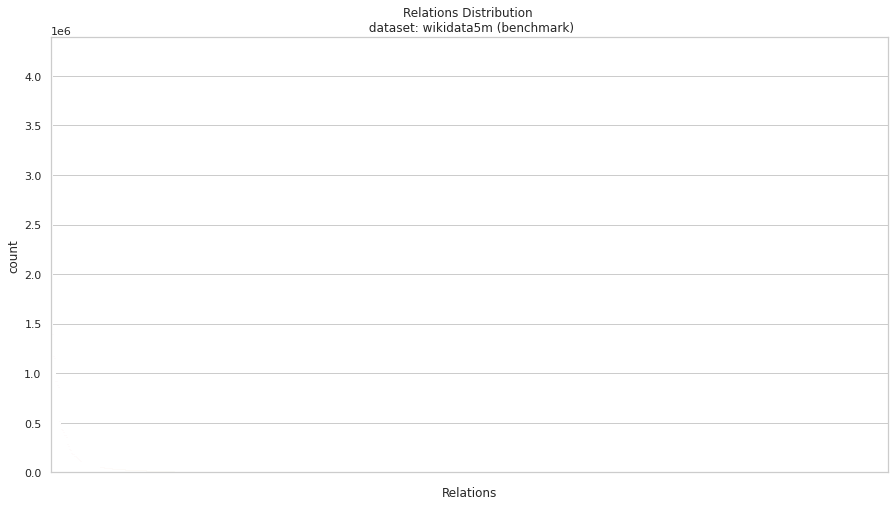

In [16]:
df = read_rdf("models/KGE/data/wikidata5m/train.txt")
draw_relations_distribution_plot(df, "wikidata5m (benchmark)", labels = False)

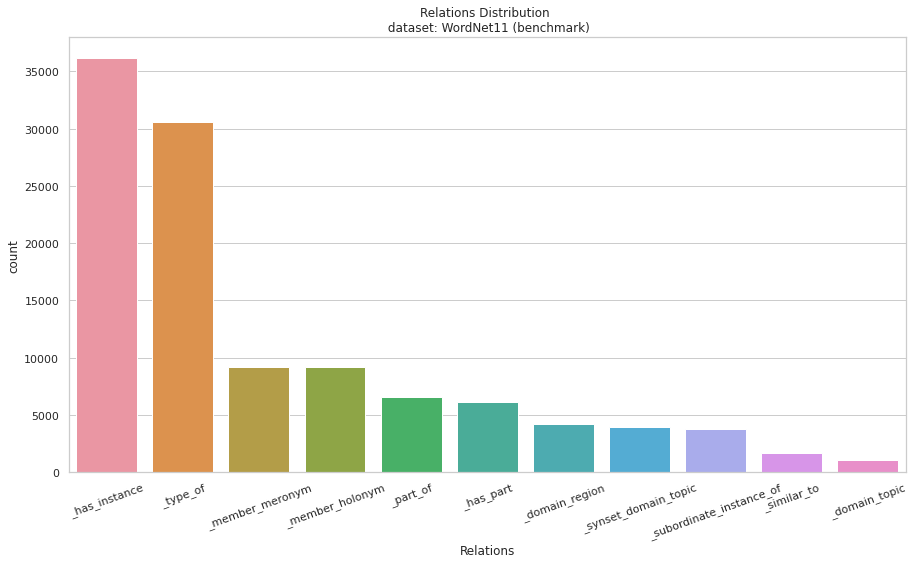

In [20]:
df = read_rdf("models/KGE/data/wn11/train.txt")
draw_relations_distribution_plot(df, "WordNet11 (benchmark)",rotate = 20)

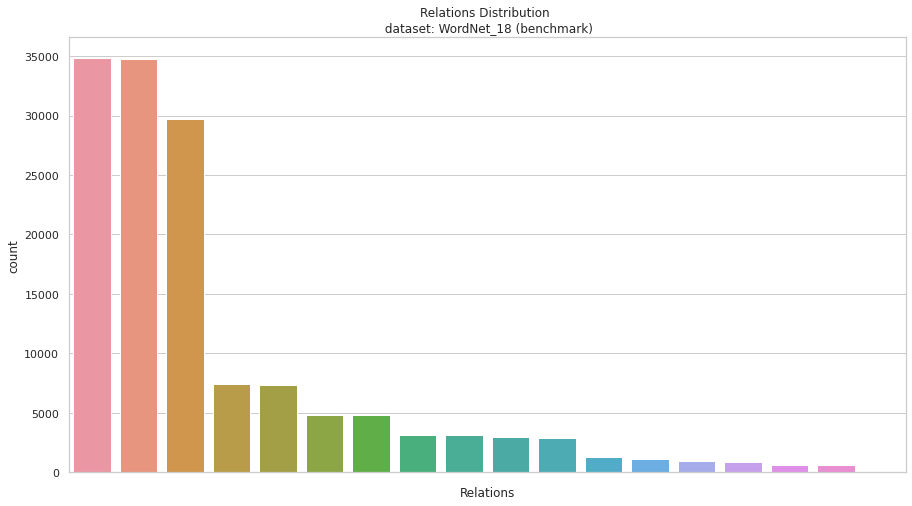

In [25]:
df = read_rdf("models/KGE/data/wn18/train.txt")
draw_relations_distribution_plot(df, "WordNet_18 (benchmark)", labels = False)

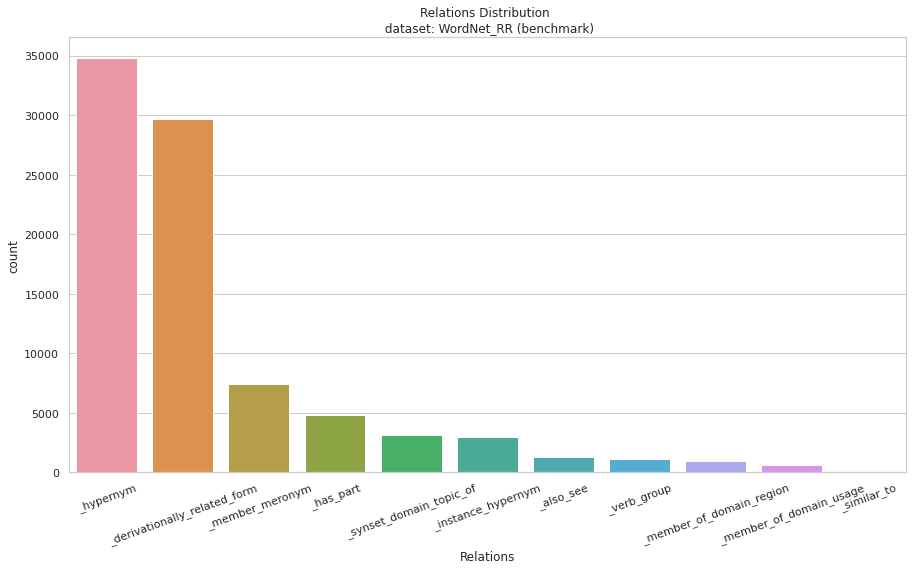

In [29]:
df = read_rdf("models/KGE/data/wnrr/train.txt")
draw_relations_distribution_plot(df, "WordNet_RR (benchmark)", rotate = 20)

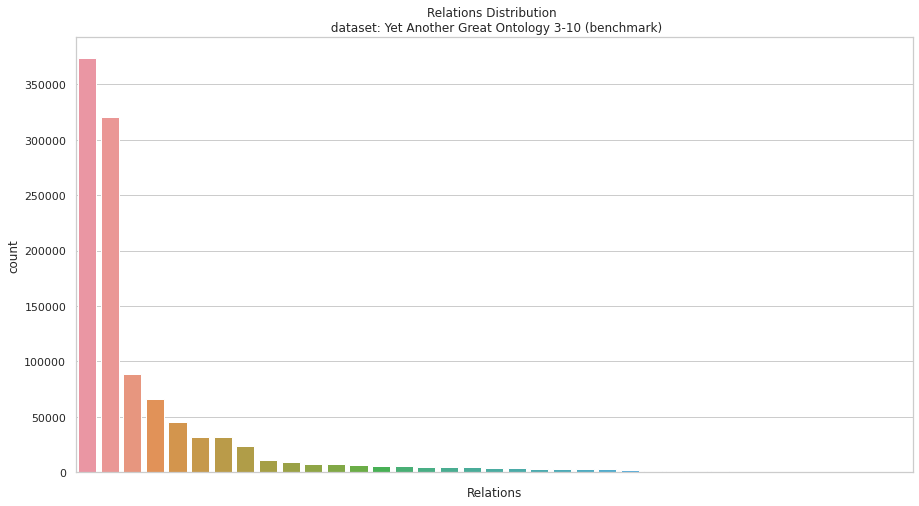

In [31]:
df = read_rdf("models/KGE/data/yago3-10/train.txt")
draw_relations_distribution_plot(df, "Yet Another Great Ontology 3-10 (benchmark)", labels = False)